# MTHM503 - Applications of Data Science and Statistics

Declaration of AI Assistance: I have used OpenAI’s ChatGPT tool in creating this report.

AI-supported/AI-integrated use is permitted in this assessment. I acknowledge the following uses of GenAI tools in this assessment:

1. I have used GenAI tools to help me understand key theories and concepts.

2. I have used GenAI tools to check and bug fix my code.

3. I have used GenAI tools to proofread and correct grammar or spelling errors.

I declare that I have referenced use of GenAI outputs within my assessment in line with the University referencing guidelines.

# Section A) Analysing the gene expression data set

###  (i) Split the dataset into training and testing sets retaining 80% for training and 20% for testing. Scale the variables (gene expression measurements) to have mean zero and standard deviation one. Explain why the data should be scaled.

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('gene_file.csv')  # Replace with your file path

# View and understand dataset
# Inspect the first few rows of the dataset
print(df.head())

# Check basic information about the dataset
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   samples        type  1007_s_at   1053_at     117_at    121_at  1255_g_at  \
0      834  ependymoma  12.498150  7.604868   6.880934  9.027128   4.176175   
1      835  ependymoma  13.067436  7.998090   7.209076  9.723322   4.826126   
2      836  ependymoma  13.068179  8.573674   8.647684  9.613002   4.396581   
3      837  ependymoma  12.456040  9.098977   6.628784  8.517677   4.154847   
4      838  ependymoma  12.699958  8.800721  11.556188  9.166309   4.165891   

    1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0  7.224920  6.085942  6.835999  ...              9.979005   
1  7.539381  6.250962  8.012549  ...             11.924749   
2  7.813101  6.007746  7.178156  ...             12.154405   
3  8.361843  6.596064  6.347285  ...             11.969072   
4  7.923826  6.212754  6.866387  ...             11.411701   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0              9.926470            12.719785            12.777792   
1             

In [44]:
# Separate features and target
X = df.drop(columns=['samples', 'type'])  # Features (gene expression data)
Y = df['type']  # Target (cancer type)

# Samples is an ID and Type is the target variable - what we want to predict. So we can remove them from X, which represents the gene data.

In [45]:
# Create Training and Testing Datasets
# Split the data (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Checking whether it has worked correctly:
print("Mean of scaled data (first 5 features):", X_scaled_train.mean(axis=0)[:5])
print("Std dev of scaled data (first 5 features):", X_scaled_train.std(axis=0)[:5])
print("Test Data - Mean (first 5 features):", X_scaled_test.mean(axis=0)[:5])

Mean of scaled data (first 5 features): [-2.08674177e-15 -1.14006773e-15  9.26379642e-16  8.38039315e-16
  2.14881876e-16]
Std dev of scaled data (first 5 features): [1. 1. 1. 1. 1.]
Test Data - Mean (first 5 features): [-0.10687846  0.04214867 -0.29429173 -0.45415985 -0.17689051]


The data needs to be scaled for a few reasons.

Reduces the impact of outliars and skewness of data. Making it more interpretable. The gene data has a range from around 3 to 15.
PCA is more effective when the data has been scaled as patterns are clearer
The datasets high dimentionality is reduced by scaling the data. Making it less complex.
More effiecient processing

###  (ii) Perform dimensionality reduction using PCA on the scaled data set and choose the optimal number of retained principal components. Explain your choice.

In [56]:
#Perform PCA on the Training data set

from sklearn import decomposition
pca = decomposition.PCA()
X_scaled_train_pca = pca.fit(X_scaled_train)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to retain 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components for 90% variance: {n_components_90}")

Number of components for 90% variance: 55


The optimal amount of retained principle components should explain 90% of the variation of the data. By working out the cumulative variance, we can see that 55 compenents explain 90%. To confirm if this dimensionality reduction is accurate, I will plot the orginal compenents against the reduced ones.

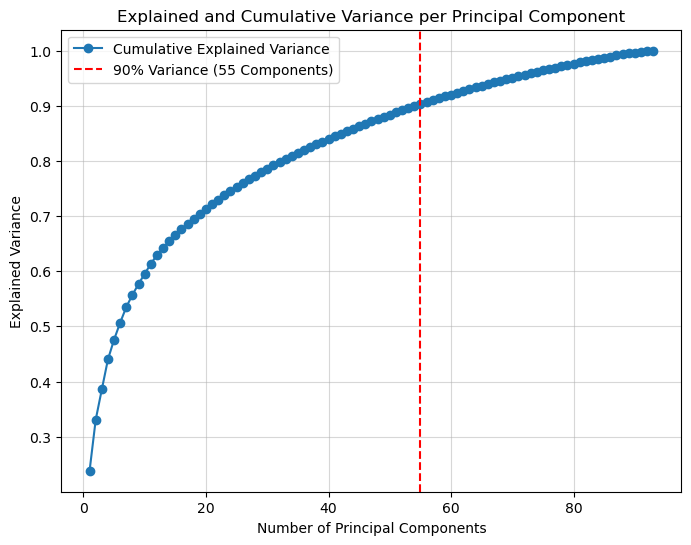

In [50]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Generate component indices
components = np.arange(1, len(cumulative_variance) + 1)

# Determine the number of components for 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

# Plot explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))

# Cumulative explained variance
plt.plot(components, cumulative_variance, marker='o', linestyle='-', label="Cumulative Explained Variance")

# Highlight the 90% variance threshold
plt.axvline(x=n_components_90, color='r', linestyle='--', label=f"90% Variance ({n_components_90} Components)")

# Labels and Title
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("Explained and Cumulative Variance per Principal Component")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

### (iii) Visualise the results of dimensionality reduction and comment on your findings. Consider using scatter plots or other relevant visualisations to showcase the reduced dimensionality.

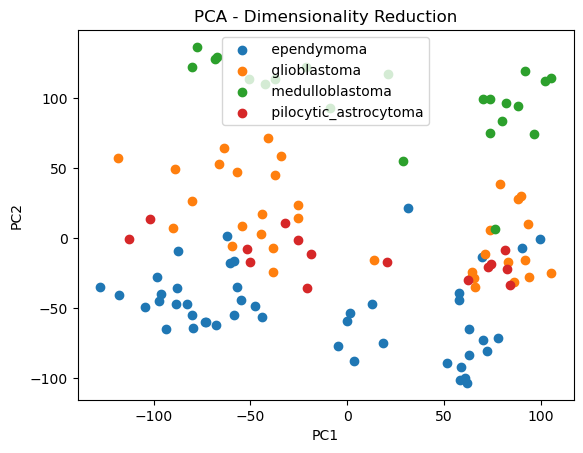

In [52]:
# Creating new reduced dataset
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

for label in df['type'].unique():
    mask = df['type'] == label
    
    plt.scatter(X_reduced[mask, 0], X_reduced[mask, 1], label=f' {label}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Dimensionality Reduction')

plt.legend()
plt.show()

The 2-dimensional PCA has started separating the different types into separate clusters. Ependymoma in particular has a more clear clustering as its distinctly separated from the other types. Whereas, the other three types are still fairly overlapped, indicating that further PCA needs to be conducted so we can see more distinct clusters.

###  (iv) Construct a logistic regression using the PCA-transformed dataset to accurately predict the cancer type. Choose a performance metric to evaluate the effectiveness of your logistic regression model.


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Applying PCA to scaled test data
pca_optimal = decomposition.PCA(n_components= 55)
X_train_pca = pca_optimal.fit_transform(X_scaled_train)
X_test_pca = pca_optimal.transform(X_scaled_test)

# Training Logisitic Regression Model
logreg = LogisticRegression(max_iter = 1000, random_state = 42)
logreg.fit(X_train_pca, Y_train)

# Making prediction using testing data
y_prediction = logreg.predict(X_test_pca)


# Evaluating Model using the Accuracy test
accuracy = accuracy_score(Y_test, y_prediction)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [63]:
np.mean(Y_test == y_prediction)

0.875

The accuraxy performance metricfrom sklearn.metrics measures the accuracy of the logistic regression model by working out the number of correct predictions divided by the total number of predictions.

To get this we use the predicted outcomes (y_prediction) and compare them to the real data (Y_test).

With a score of 0.88, 88% of predictions made were correct. Indicating that this model is fairly accurate

# Section B) Sea level change modelling

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sealevel = pd.read_csv('sealevel.csv')
sealevel['date'] = pd.to_datetime(sealevel['date'])

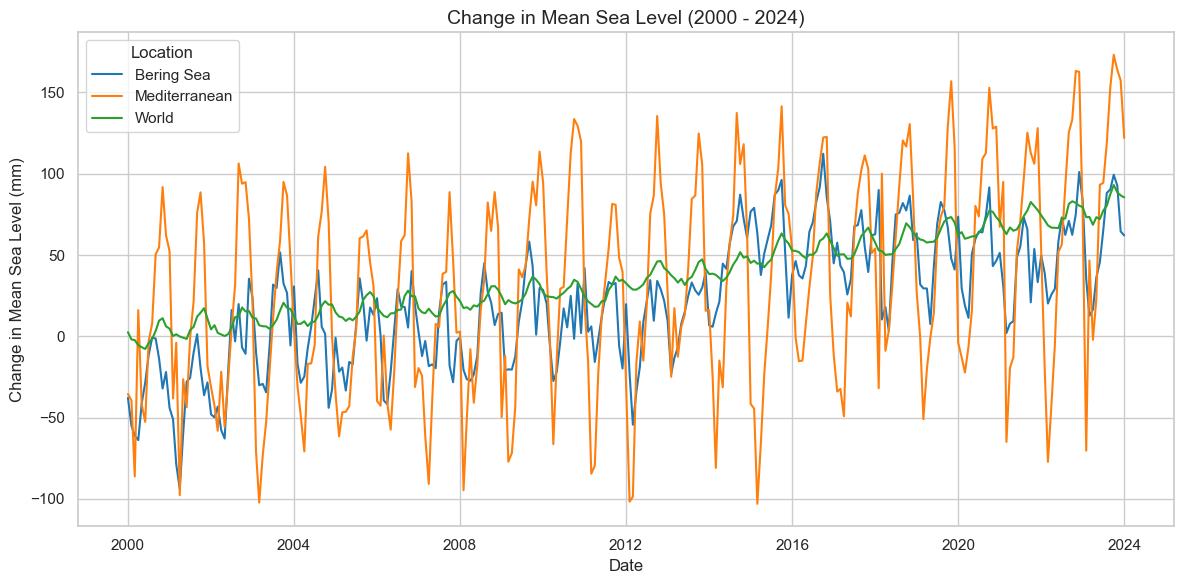

In [67]:
sns.set(style="whitegrid")

# Plot the time series of mean sea level changes for each location
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sealevel,
    x='date',
    y='Change in Mean Sea Level (mm)',
    hue='Location',
    palette='tab10'
)

# Enhance plot readability
plt.title('Change in Mean Sea Level (2000 - 2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Change in Mean Sea Level (mm)', fontsize=12)
plt.legend(title='Location')
plt.tight_layout()

# Show the plot
plt.show()

In the Figure above, we can see a clear increase in change in mean sea level from 2000 to 2024, across all three locations.
As expected the Mediterranean and Bering Seas have volitile seasonal changes, with a year range of around 200mm and 70mm. Whereas, the world mean sea level, is much less volitile, as shows by its yearly range of around 10mm. 

Despite this, the mean sea level has steadily risen over the last 24 years, as showns by the Worlds change in mean sea level sitting around +80mm yearly, from its base point in 2000.

It's important to look at the long term when analysing this data, as its important to understand and capture the fluctuations caused by seasons.

## Regression Model

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

sealevel['year'] = pd.to_datetime(sealevel['date']).dt.year
sealevel['month'] = pd.to_datetime(sealevel['date']).dt.month

locations = ["Bering Sea", "Mediterranean", "World"]
models = {}
results = {}

# Loop over each location
for location in locations:
    # Subset data for the location
    loc_data = sealevel[sealevel["Location"] == location]
    
    # Had issues with the Date column, so i'm creating time.
    loc_data['time'] = (pd.to_datetime(loc_data['date']) - pd.to_datetime('2000-01-01')).dt.days // 30  # Approximate months
    
    X = loc_data[['time']].values  # Predictor variable (time in months)
    Y = loc_data["Change in Mean Sea Level (mm)"].values  # Target variable (change in mean sea level)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X, Y)
    
    # Predicting values and calculate R^2 score
    y_pred = model.predict(X)
    r2 = r2_score(Y, y_pred)
    
    models[location] = model
    results[location] = {"R^2": r2}

# Displaying the R^2 values for each location in a table
r2_table = pd.DataFrame({location: [results[location]["R^2"]] for location in locations}, index=["R^2"])
print(r2_table.T)

                    R^2
Bering Sea     0.526528
Mediterranean  0.136573
World          0.937769


C:\Users\james\AppData\Local\Temp\ipykernel_4644\104387721.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['time'] = (pd.to_datetime(loc_data['date']) - pd.to_datetime('2000-01-01')).dt.days // 30  # Approximate months
C:\Users\james\AppData\Local\Temp\ipykernel_4644\104387721.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['time'] = (pd.to_datetime(loc_data['date']) - pd.to_datetime('2000-01-01')).dt.days // 30  # Approximate months
C:\Users\james\AppData\Local\Temp\ipykernel_46

The R^2 values indicate that the model explains 94% of variation in the world location, 52% in the Bering sea and only 14% in the Mediterranean.
Despite this model, being simple, it captures long term variation more accurately. The Mediterranean's low score is becuase its extreme seasonal fluctuations arent fitted in this model.

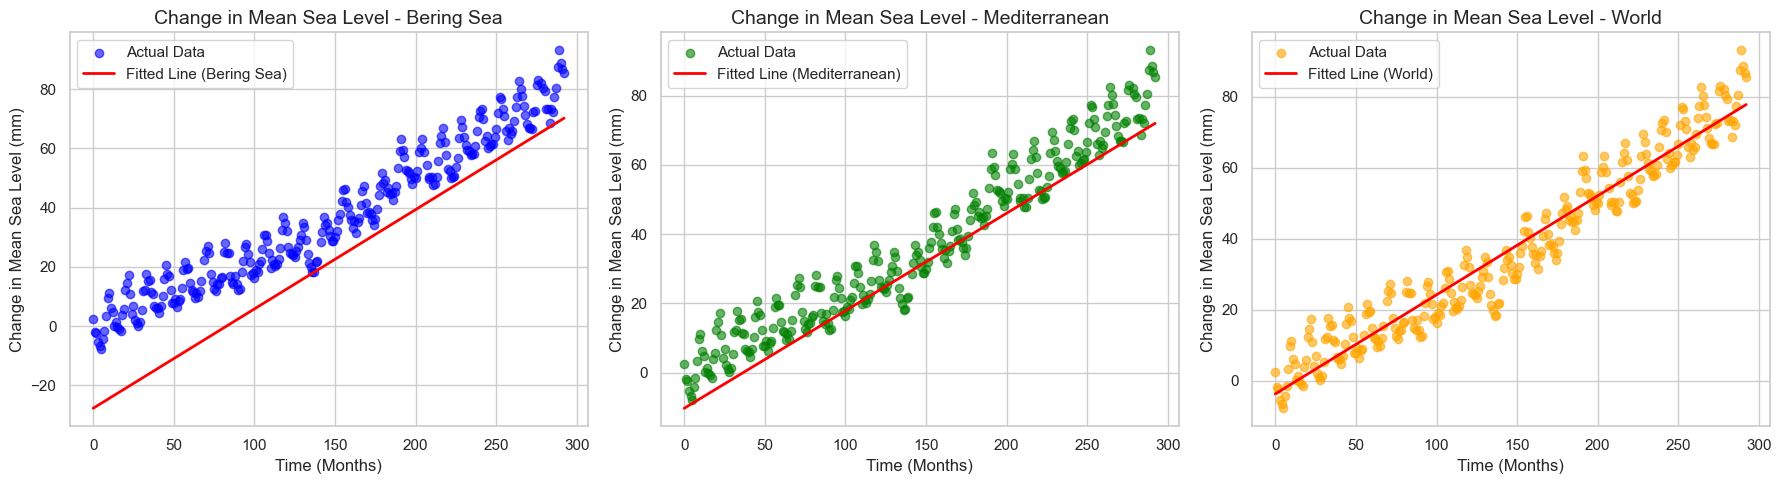

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

locations = ["Bering Sea", "Mediterranean", "World"]
colors = ['blue', 'green', 'orange']

for i, location in enumerate(locations):
    loc_data = sealevel[sealevel["Location"] == location]

    ax = axes[i]
    ax.scatter(X, Y, label="Actual Data", color=colors[i], alpha=0.6)
    
    # Fitted regression line
    y_pred = models[location].predict(X)
    ax.plot(X, y_pred, label=f"Fitted Line ({location})", color='red', linewidth=2)
    
    ax.set_title(f"Change in Mean Sea Level - {location}", fontsize=14)
    ax.set_xlabel("Time (Months)", fontsize=12)
    ax.set_ylabel("Change in Mean Sea Level (mm)", fontsize=12)
    ax.legend()

plt.tight_layout()
plt.show()

The graphs above are fitted with regression lines to reveal the underlying trends for each location. From these, we can infer that the mean sea level is increasing year after year across the globe. Among the locations, the World has the best-fitted regression line, suggesting that the model explains this trend most effectively for this location. In contrast, the regression line for the Bering Sea is not as well-fitted, indicating less accuracy in capturing the trend for this region. Nevertheless, all regression lines align with the expected upward trends, suggesting that the model predicts a continued year-on-year increase in mean sea level.

### Residual Plot

C:\Users\james\AppData\Local\Temp\ipykernel_4644\3533156821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['time'] = np.arange(len(loc_data)) / 12
C:\Users\james\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\james\AppData\Local\Temp\ipykernel_4644\3533156821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_data['time'] = np.arange(len(loc_data)) / 12
C:\Users\james\anacon

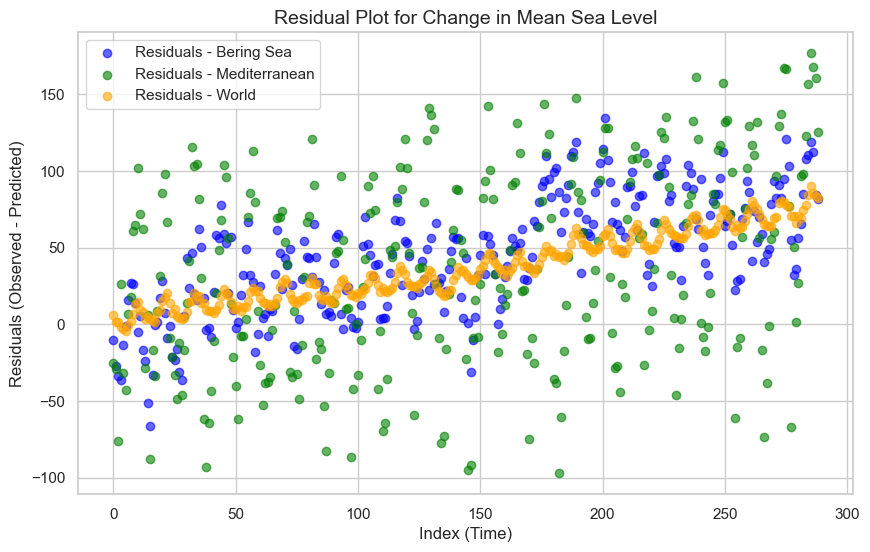

In [73]:
locations = ["Bering Sea", "Mediterranean", "World"]
colors = ['blue', 'green', 'orange']
residuals = []
labels = []

for i, location in enumerate(locations):
    loc_data = sealevel[sealevel["Location"] == location]
    loc_data['time'] = np.arange(len(loc_data)) / 12
    
    model = models[location]
    y_pred = model.predict(loc_data[['time']])
    residuals_for_location = loc_data["Change in Mean Sea Level (mm)"] - y_pred 
    residuals.append(residuals_for_location)
    labels.append(location)

plt.figure(figsize=(10, 6))
for i, location in enumerate(locations):
    plt.scatter(np.arange(len(residuals[i])), residuals[i], label=f'Residuals - {location}', alpha=0.6, color=colors[i])

plt.title('Residual Plot for Change in Mean Sea Level', fontsize=14)
plt.xlabel('Index (Time)', fontsize=12)
plt.ylabel('Residuals (Observed - Predicted)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

The graph above displays the residual data points across the three locations. As expected, the residuals for the Mediterranean and Bering Sea are wildly scattered. This was expected as we already know the model isn't well fitted for these locations. The World is better fitted as the points are closer to 0.

# Section C) Power demand clustering

In [75]:
power = pd.read_csv('January_2013.csv')
power['Date'] = pd.to_datetime(power['Date'])
power.shape

(15095, 146)

### 1. Data-processing

In [77]:
#i)
# Selected columns with power data, 00:00 to 23:50. The first two were metadata.
# Dividing each value by the highest value in its corresponding row.
power_normalised = power.iloc[:, 2:].div(power.iloc[:, 2:].max(axis=1), axis=0)

# Adding back the Date and Substation Column
power_normalised["Date"] = power["Date"]
power_normalised["Substation"] = power["Substation"]

# Placing Date and Substation before the power data.
power_normalised = power_normalised[["Date", "Substation"] + list(power.columns[2:])]

print(power_normalised.head(2))

        Date  Substation     00:00     00:10     00:20     00:30     00:40  \
0 2013-01-03      511016  0.596742  0.602990  0.614149  0.610801  0.575764   
1 2013-01-03      511029  0.624220  0.722846  0.754057  0.643571  0.802122   

      00:50     01:00     01:10  ...     22:20     22:30     22:40     22:50  \
0  0.554787  0.565276  0.535148  ...  0.757867  0.769917  0.737782  0.710333   
1  0.834582  0.843321  0.818976  ...  0.655119  0.630774  0.647940  0.640762   

      23:00     23:10     23:20     23:30     23:40     23:50  
0  0.675073  0.686454  0.680875  0.671502  0.635126  0.603883  
1  0.637328  0.659800  0.631086  0.634519  0.687266  0.680400  

[2 rows x 146 columns]


In [79]:
# ii)

# Filter out weekends (Saturday=5, Sunday=6)
power_weekdays = power_normalised[power_normalised['Date'].dt.weekday < 5]

In [93]:
# iii)
# Average daily power demand profiles

# Group by Substation and calculate the mean for each 10-minute interval
avg_daily_profile = (
    power_weekdays.groupby("Substation")
    .mean(numeric_only=True)
)

print(avg_daily_profile.head(2))

               00:00     00:10     00:20     00:30     00:40     00:50  \
Substation                                                               
511016      0.591735  0.596037  0.577479  0.567874  0.560374  0.552640   
511029      0.571221  0.641650  0.672472  0.695803  0.752872  0.740979   

               01:00     01:10     01:20     01:30  ...     22:20     22:30  \
Substation                                          ...                       
511016      0.544367  0.531079  0.523659  0.511897  ...  0.760142  0.742951   
511029      0.729712  0.710950  0.700275  0.685422  ...  0.747371  0.720871   

               22:40     22:50     23:00     23:10     23:20     23:30  \
Substation                                                               
511016      0.721639  0.714996  0.709921  0.694241  0.675090  0.654038   
511029      0.686436  0.678937  0.660703  0.643323  0.630763  0.615327   

               23:40     23:50  
Substation                      
511016      0.629824  0

### 2. Hierarchical Clustering

In [95]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

In [97]:
# Calculate the distance matrix (Euclidean distance)
distance_matrix = squareform(pdist(avg_daily_profile, metric="euclidean"))
distance_df = pd.DataFrame(
    distance_matrix,
    index=avg_daily_profile.index,
    columns=avg_daily_profile.index
)

C:\Users\james\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\james\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
C:\Users\james\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\james\anaconda3\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


<Figure size 1200x1000 with 0 Axes>

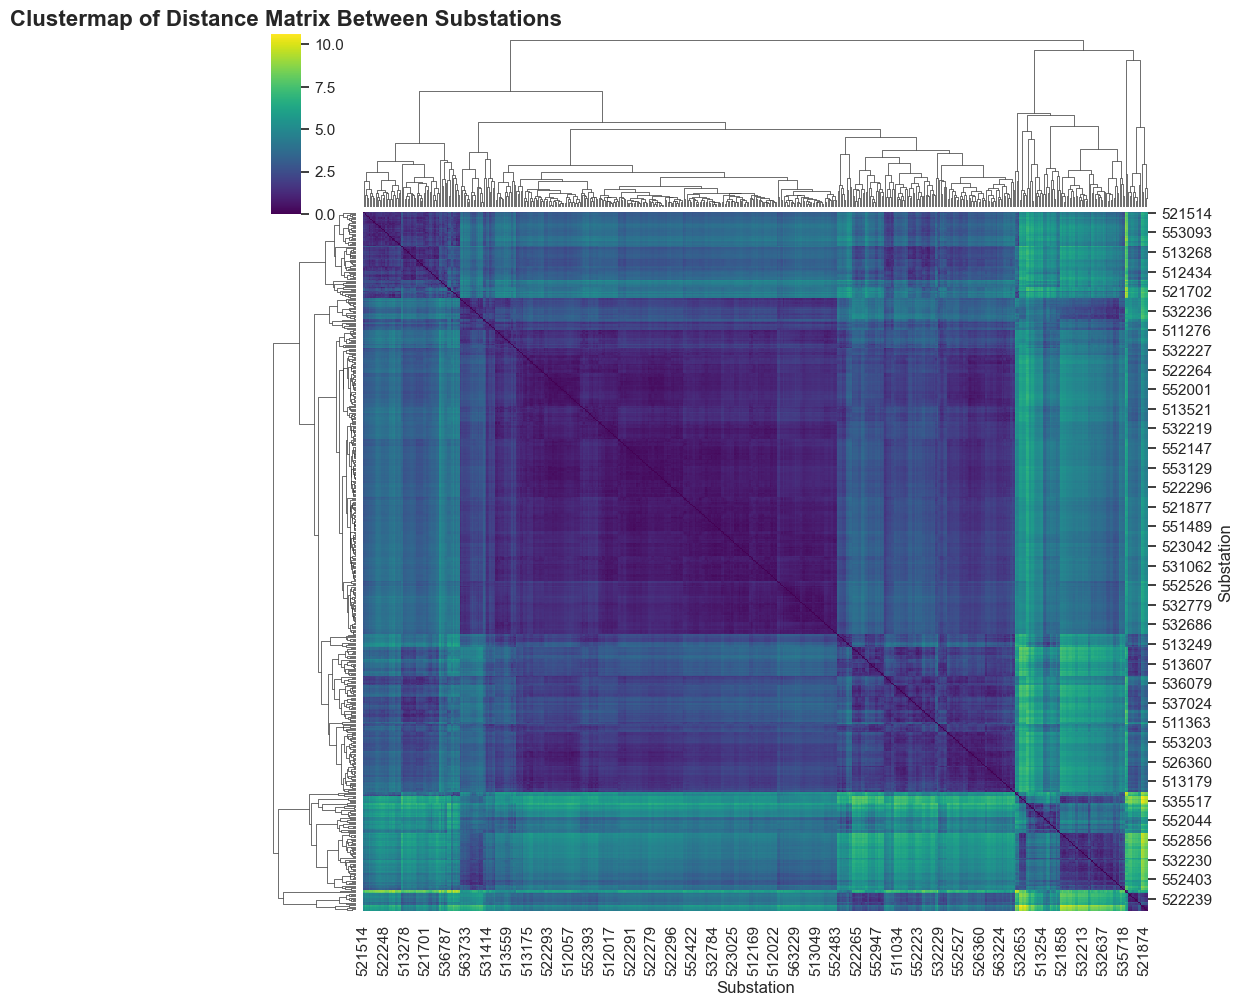

In [99]:
plt.figure(figsize=(12, 10))
sns.clustermap(
    distance_df,
    cmap='viridis',
    row_cluster=True,
    col_cluster=True,
    dendrogram_ratio=(0.1, 0.2),
    cbar_pos=(0.02, 0.8, 0.03, 0.18)
)
plt.title("Clustermap of Distance Matrix Between Substations", fontsize=16, fontweight='bold')

plt.show()

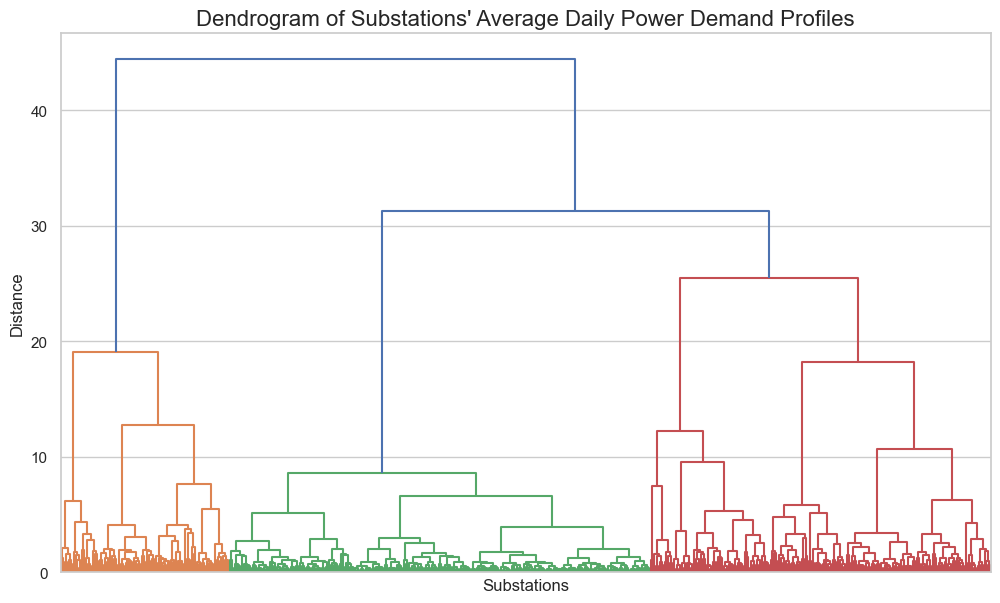

In [101]:
linkage_matrix = linkage(avg_daily_profile, method="ward")

plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, no_labels=True)

plt.title("Dendrogram of Substations' Average Daily Power Demand Profiles", fontsize=16)
plt.ylabel("Distance", fontsize=12)
plt.xlabel("Substations", fontsize=12)

plt.show()

For linkage, I decided to chose the Ward method because it minimises the total within-cluster variance, making it suitable for compact and well-separated clusters. It works well as I expected clusters to form around similar demand profiles.

In [103]:
# ii) From looking at the dendrogram above, we can see there are distict clusters forming around the distance 15.
# I count 6 clusters at this level. I chose this level as there is the most clear separation at a level which still contains detail.

from scipy.cluster.hierarchy import fcluster

# Threshold distance
cluster_labels = fcluster(linkage_matrix, t=6, criterion="maxclust")  # 6 clusters

# Cluster labels.
avg_daily_profile["Cluster"] = cluster_labels

cluster_counts = avg_daily_profile["Cluster"].value_counts()
print(cluster_counts)

Cluster
3    242
6     83
2     75
4     69
5     44
1     22
Name: count, dtype: int64


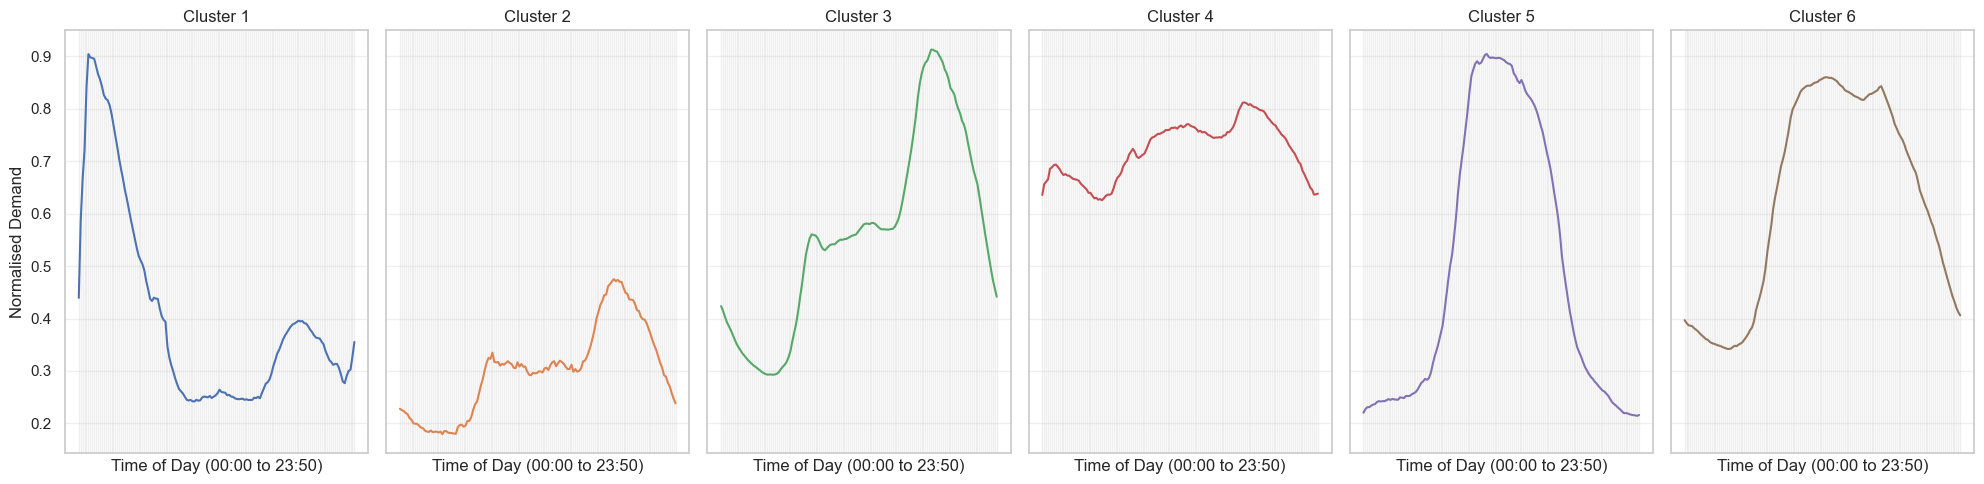

In [111]:
## iii) 
n_clusters = 6
cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

cluster_profiles = avg_daily_profile.groupby('Cluster').mean()

if 'Cluster' in cluster_profiles.columns:
    cluster_profiles = cluster_profiles.drop(columns=['Cluster'])

fig, axes = plt.subplots(1, n_clusters, figsize=(20, 5), sharey=True)

for i, ax in enumerate(axes, start=1):
    ax.plot(
        cluster_profiles.columns,
        cluster_profiles.loc[i], 
        label=f"Cluster {i}",
        color=f"C{i-1}"
    )
    ax.set_title(f"Cluster {i}")
    ax.set_xlabel("Time of Day (00:00 to 23:50)")
    if i == 1:
        ax.set_ylabel("Normalised Demand")
    ax.grid(alpha=0.3)
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

plt.tight_layout()
plt.show()

### 3. Cluster Evaluation

In [107]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Compute silhouette scores
silhouette_avg = silhouette_score(avg_daily_profile, cluster_labels)
silhouette_vals = silhouette_samples(avg_daily_profile, cluster_labels)

print(f"Average Silhouette Score: {silhouette_avg:.3f}")

Average Silhouette Score: 0.486


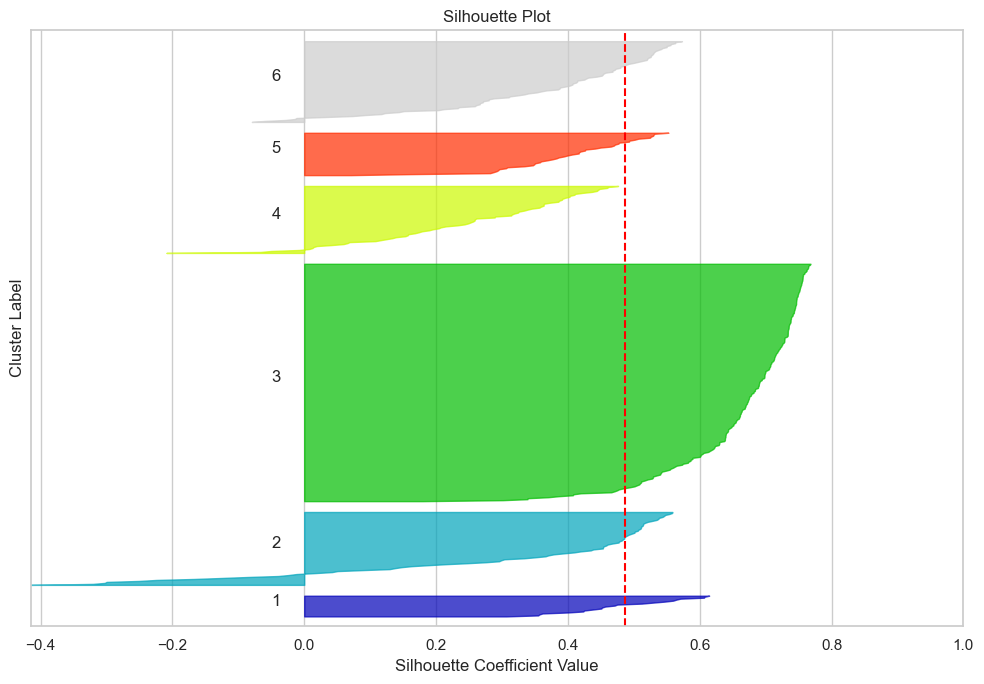

Average Silhouette Score: 0.486


In [115]:
import matplotlib.cm as cm

silhouette_vals = silhouette_samples(avg_daily_profile, cluster_labels)
silhouette_avg = silhouette_score(avg_daily_profile, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

ax1.set_xlim([silhouette_vals.min(), 1])
n_clusters = 6 
ax1.set_ylim([0, avg_daily_profile.shape[0] + (n_clusters + 1) * 10])
y_lower = 10

for i in range(1, n_clusters + 1):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_title("Silhouette Plot")
ax1.set_xlabel("Silhouette Coefficient Value")
ax1.set_ylabel("Cluster Label")

ax1.set_yticks([])

plt.tight_layout()
plt.show()

print(f"Average Silhouette Score: {silhouette_avg:.3f}")

In [ ]:
print("The average silhouette_score is :", silhouette_avg)

The Silhouette plot displays that clusters one, three and five are appropriately clustered. Whilst, clusters two, four and six show very slight boardering neighboughing clusters. Despite this, the graph indicates that these clusters have a strong structure, as shown by their width, perticualrly cluster three and six.

### 4. Giving context

Looking at the subplots of daily average demand profiles of each cluster. We can observe the uniqueness of each cluster. 

Cluster One, these substations have an extreme surge in their daily power demand (0.9) from the early hours of the way and this steeply falls off after a few hours (0.25). The extremeness of this graph may be due to the lack of substations in the cluster, only 22.

Cluster Two, on average has the lowest average power demand. Reaching a peak of 0.47, but avareging around 0.3

Following Cluster three, a similar pattern to cluster Two, but maintaining a very high level of demand and reaching a peak over 0.9.

Cluster four has the least voltility in shape, maintaining a demand level of around 0.7

Cluster five and Cluster six have a similar shape, resempling one of a normal distribution. However, five has a much steeper rise and falls within an hour or, whereas, six has a higher base level demand, a slower climb to its peak demand and a slower reducting on demand.